In [1]:
pip install --upgrade scikit-learn imbalanced-learn


  Using cached scikit_learn-1.7.2-cp312-cp312-win_amd64.whl.metadata (11 kB)
  Using cached imbalanced_learn-0.14.0-py3-none-any.whl.metadata (8.8 kB)
Using cached scikit_learn-1.7.2-cp312-cp312-win_amd64.whl (8.7 MB)
Using cached imbalanced_learn-0.14.0-py3-none-any.whl (239 kB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.3.2
    Uninstalling scikit-learn-1.3.2:
      Successfully uninstalled scikit-learn-1.3.2
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.11.0
    Uninstalling imbalanced-learn-0.11.0:
      Successfully uninstalled imbalanced-learn-0.11.0
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install scikit-learn==1.3.2 imbalanced-learn==0.11.0


  Using cached scikit_learn-1.3.2-cp312-cp312-win_amd64.whl.metadata (11 kB)
  Using cached imbalanced_learn-0.11.0-py3-none-any.whl.metadata (8.3 kB)
Using cached scikit_learn-1.3.2-cp312-cp312-win_amd64.whl (9.1 MB)
Using cached imbalanced_learn-0.11.0-py3-none-any.whl (235 kB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.7.2
    Uninstalling scikit-learn-1.7.2:
      Successfully uninstalled scikit-learn-1.7.2
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.14.0
    Uninstalling imbalanced-learn-0.14.0:
      Successfully uninstalled imbalanced-learn-0.14.0
Note: you may need to restart the kernel to use updated packages.


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, auc

from imblearn.over_sampling import SMOTE


In [7]:
# Path to your dataset (make sure creditcard.csv is in the same folder as the notebook)
file_path = "C:/Users/preet/Downloads/creditcard.csv"

# Load data
df = pd.read_csv(file_path)
df.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [9]:
print("Shape of dataset:", df.shape)
print("\nClass distribution:\n", df['Class'].value_counts())
df.describe()


Shape of dataset: (284807, 31)

Class distribution:
 Class
0    284315
1       492
Name: count, dtype: int64


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [11]:
# Features and target
X = df.drop('Class', axis=1)
y = df['Class']

# Normalize 'Time' and 'Amount'
scaler = StandardScaler()
X[['Time', 'Amount']] = scaler.fit_transform(X[['Time', 'Amount']])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

print("Train shape:", X_train.shape, "Test shape:", X_test.shape)


Train shape: (227845, 30) Test shape: (56962, 30)


In [13]:
lr = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)
y_prob_lr = lr.predict_proba(X_test)[:, 1]

print("=== Logistic Regression (Class Weights) ===")
print("ROC-AUC:", roc_auc_score(y_test, y_prob_lr))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))
print("Classification Report:\n", classification_report(y_test, y_pred_lr))


=== Logistic Regression (Class Weights) ===
ROC-AUC: 0.9720881652464024
Confusion Matrix:
 [[55478  1386]
 [    8    90]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.06      0.92      0.11        98

    accuracy                           0.98     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.98      0.99     56962



In [15]:
rf = RandomForestClassifier(n_estimators=200, class_weight='balanced_subsample', 
                            n_jobs=-1, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:, 1]

print("=== Random Forest (Class Weights) ===")
print("ROC-AUC:", roc_auc_score(y_test, y_prob_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))


=== Random Forest (Class Weights) ===
ROC-AUC: 0.947053944678603
Confusion Matrix:
 [[56861     3]
 [   25    73]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.96      0.74      0.84        98

    accuracy                           1.00     56962
   macro avg       0.98      0.87      0.92     56962
weighted avg       1.00      1.00      1.00     56962



In [16]:
!pip uninstall scikit-learn imbalanced-learn -y
!pip install scikit-learn==1.3.2 imbalanced-learn==0.11.0


Found existing installation: scikit-learn 1.3.2
Uninstalling scikit-learn-1.3.2:
  Successfully uninstalled scikit-learn-1.3.2
Found existing installation: imbalanced-learn 0.11.0
Uninstalling imbalanced-learn-0.11.0:
  Successfully uninstalled imbalanced-learn-0.11.0


You can safely remove it manually.


  Using cached scikit_learn-1.3.2-cp312-cp312-win_amd64.whl.metadata (11 kB)
  Using cached imbalanced_learn-0.11.0-py3-none-any.whl.metadata (8.3 kB)
Using cached scikit_learn-1.3.2-cp312-cp312-win_amd64.whl (9.1 MB)
Using cached imbalanced_learn-0.11.0-py3-none-any.whl (235 kB)


In [19]:
#SMOTE Oversampling + Logistic Regression & Random Forest
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)

print("After SMOTE Resampling:", np.bincount(y_res))

# Logistic Regression after SMOTE
lr_sm = LogisticRegression(max_iter=1000, random_state=42)
lr_sm.fit(X_res, y_res)

y_pred_lr_sm = lr_sm.predict(X_test)
y_prob_lr_sm = lr_sm.predict_proba(X_test)[:, 1]

print("\n=== Logistic Regression (SMOTE) ===")
print("ROC-AUC:", roc_auc_score(y_test, y_prob_lr_sm))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr_sm))
print("Classification Report:\n", classification_report(y_test, y_pred_lr_sm))

# Random Forest after SMOTE
rf_sm = RandomForestClassifier(n_estimators=200, n_jobs=-1, random_state=42)
rf_sm.fit(X_res, y_res)

y_pred_rf_sm = rf_sm.predict(X_test)
y_prob_rf_sm = rf_sm.predict_proba(X_test)[:, 1]

print("\n=== Random Forest (SMOTE) ===")
print("ROC-AUC:", roc_auc_score(y_test, y_prob_rf_sm))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf_sm))
print("Classification Report:\n", classification_report(y_test, y_pred_rf_sm))


After SMOTE Resampling: [227451 227451]

=== Logistic Regression (SMOTE) ===
ROC-AUC: 0.9698873359135438
Confusion Matrix:
 [[55403  1461]
 [    8    90]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.99     56864
           1       0.06      0.92      0.11        98

    accuracy                           0.97     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.97      0.99     56962


=== Random Forest (SMOTE) ===
ROC-AUC: 0.975393850562172
Confusion Matrix:
 [[56851    13]
 [   16    82]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.86      0.84      0.85        98

    accuracy                           1.00     56962
   macro avg       0.93      0.92      0.92     56962
weighted avg       1.00      1.00      1.00     56962



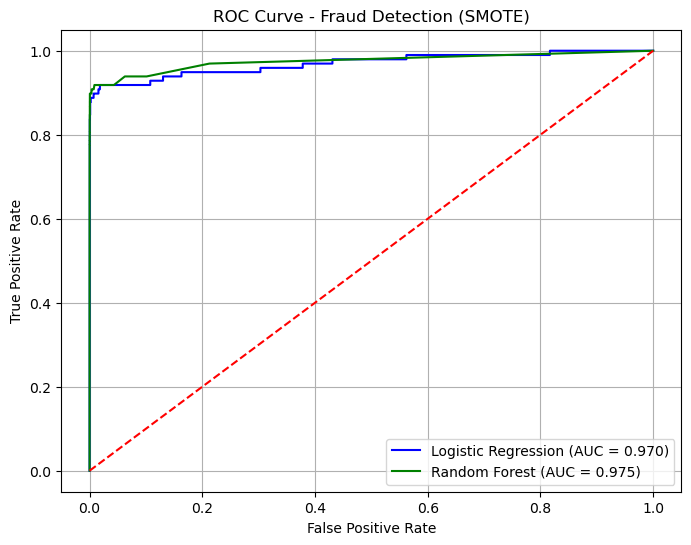

In [21]:
# ROC curves for Logistic Regression and Random Forest (with SMOTE)
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr_sm)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf_sm)

roc_auc_lr = auc(fpr_lr, tpr_lr)
roc_auc_rf = auc(fpr_rf, tpr_rf)

plt.figure(figsize=(8,6))
plt.plot(fpr_lr, tpr_lr, color='blue', label=f'Logistic Regression (AUC = {roc_auc_lr:.3f})')
plt.plot(fpr_rf, tpr_rf, color='green', label=f'Random Forest (AUC = {roc_auc_rf:.3f})')

# Reference line (random guessing)
plt.plot([0,1], [0,1], color='red', linestyle='--')

# Plot formatting
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Fraud Detection (SMOTE)")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


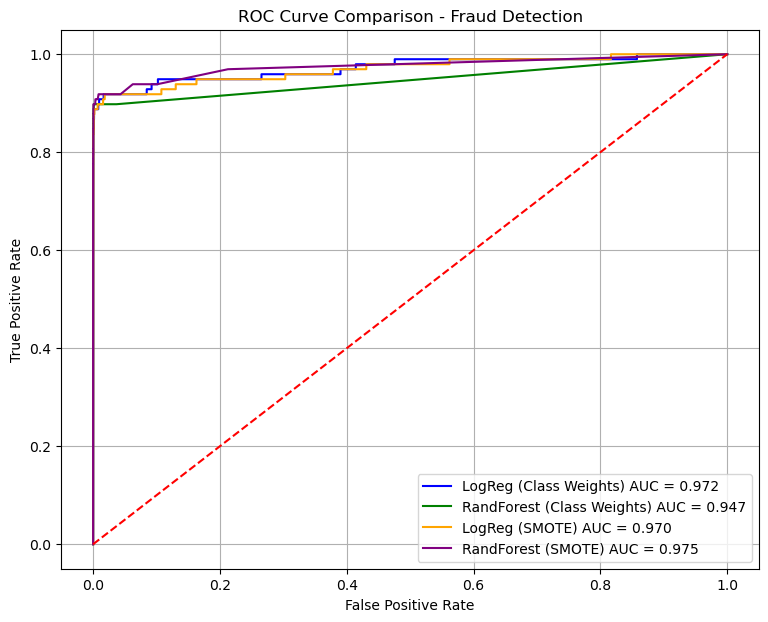

In [23]:
# ROC curves for all 4 models
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)         # Logistic Regression (Class Weights)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)         # Random Forest (Class Weights)
fpr_lr_sm, tpr_lr_sm, _ = roc_curve(y_test, y_prob_lr_sm) # Logistic Regression (SMOTE)
fpr_rf_sm, tpr_rf_sm, _ = roc_curve(y_test, y_prob_rf_sm) # Random Forest (SMOTE)

roc_auc_lr = auc(fpr_lr, tpr_lr)
roc_auc_rf = auc(fpr_rf, tpr_rf)
roc_auc_lr_sm = auc(fpr_lr_sm, tpr_lr_sm)
roc_auc_rf_sm = auc(fpr_rf_sm, tpr_rf_sm)

# Plot
plt.figure(figsize=(9,7))

plt.plot(fpr_lr, tpr_lr, label=f'LogReg (Class Weights) AUC = {roc_auc_lr:.3f}', color='blue')
plt.plot(fpr_rf, tpr_rf, label=f'RandForest (Class Weights) AUC = {roc_auc_rf:.3f}', color='green')
plt.plot(fpr_lr_sm, tpr_lr_sm, label=f'LogReg (SMOTE) AUC = {roc_auc_lr_sm:.3f}', color='orange')
plt.plot(fpr_rf_sm, tpr_rf_sm, label=f'RandForest (SMOTE) AUC = {roc_auc_rf_sm:.3f}', color='purple')

# Random guess line
plt.plot([0,1], [0,1], 'r--')

# Formatting
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison - Fraud Detection")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


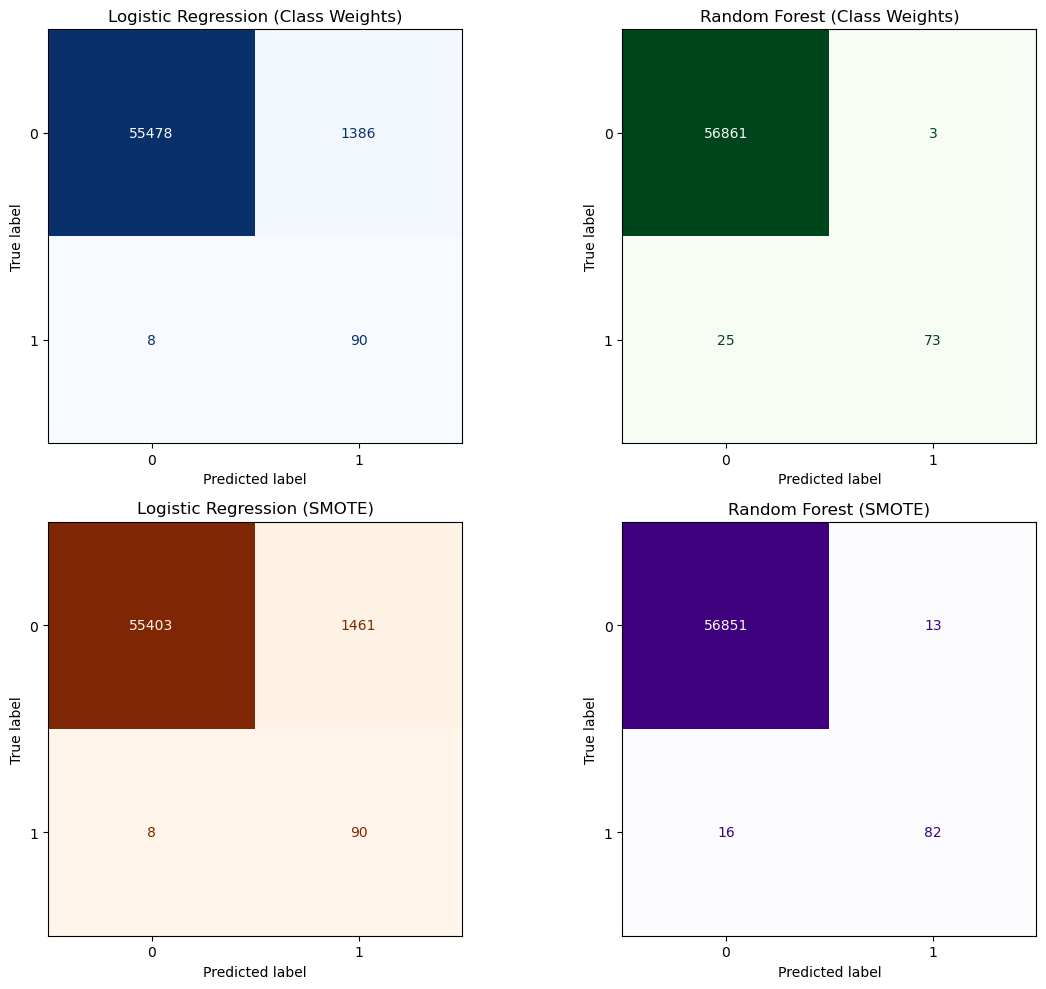

In [25]:
from sklearn.metrics import ConfusionMatrixDisplay

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Logistic Regression (Class Weights)
ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred_lr, ax=axes[0,0], cmap="Blues", colorbar=False
)
axes[0,0].set_title("Logistic Regression (Class Weights)")

# Random Forest (Class Weights)
ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred_rf, ax=axes[0,1], cmap="Greens", colorbar=False
)
axes[0,1].set_title("Random Forest (Class Weights)")

# Logistic Regression (SMOTE)
ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred_lr_sm, ax=axes[1,0], cmap="Oranges", colorbar=False
)
axes[1,0].set_title("Logistic Regression (SMOTE)")

# Random Forest (SMOTE)
ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred_rf_sm, ax=axes[1,1], cmap="Purples", colorbar=False
)
axes[1,1].set_title("Random Forest (SMOTE)")

plt.tight_layout()
plt.show()
